# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Tangonan, Darwin James\
_Student No._: 2022-08539\
_Section_: TX3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: DARWI JAMES JARDINICO TANGONAN**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

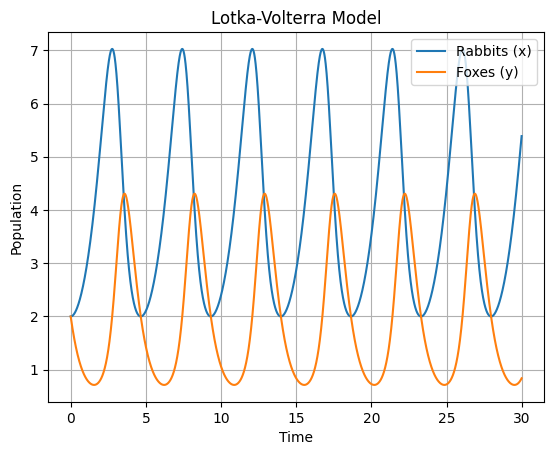

In [4]:
from numpy import arange, array
import matplotlib.pyplot as plt

# Treating the system as a vector ODE, define the RHS functions as f
# note that t is not an explicit variable in this case, hence our code can be simplified
def f(r):
    x, y = r[0], r[1]               # unppack the vector r into x and y
    fx = 1.0 * x - 0.5 * x * y      # define the RHS of the 1st and 2nd ODE
    fy = 0.5 * x * y - 2.0 * y
    return array([fx, fy])

# Number of steps and precision
N = 3000
h = 30 / N

# Arrays to store the results, and their corresponding time point
tpoints = arange(0, 30, h)
xpoints = []
ypoints = []

# Initial values, in vector form r = (x, y) = (2, 2)
r = array([2.0, 2.0])

# Runge-Kutta 4th order method, Loop over all time points
for t in tpoints:
    # add obtained values of r to the x and y arrays
    xpoints.append(r[0])
    ypoints.append(r[1])

    # calculate the 4 k values to obtain new (x,y) values
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Plotting the results
plt.plot(tpoints, xpoints, label='Rabbits (x)')
plt.plot(tpoints, ypoints, label='Foxes (y)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Model')
plt.legend()
plt.grid(True)
plt.show()

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


**Set Up**

The solution flow is quite similar to that of problem 1, the only difference is that we are *initially* dealing with a 2nd order ODE. This can be converted to a system of 2 1st order ODE by introducing an intermediate variable $ω$ (due to this problem having a physical interpretation, we decide to use omega or angular velocity)

hence the 2nd order ODE (obtained from applying newtons laws and angular kinematics)
$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l} \sin {\theta} ,$$

transform to:
$$ \frac{d \theta}{dt} = \omega, $$
$$ \frac{d \omega}{dt} = -\frac{g}{l} \sin {\theta}. $$

The rest is the numerical calculation of the ODE system.

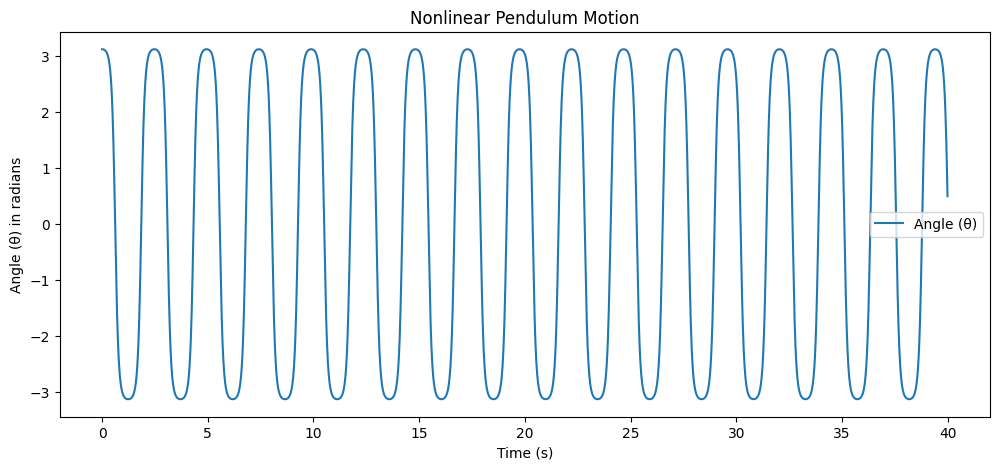

In [26]:
from numpy import arange, array, pi, sin
import matplotlib.pyplot as plt
from math import sqrt

# Constants and Initial Values
g = 9.81                    # acceleration due to gravity in m/s^2
L = 0.1                     # length of the pendulum in meters
theta0 = 179 * (pi / 180)   # initial angle in radians
omega0 = 0.0                # initial angular velocity in rad/s

# Define the system of equations
def f(r):
    theta, omega = r[0], r[1]           # unpack the array r into theta and omega
    f_theta = omega                     # define 1st and 2nd ODEs
    f_omega = -(g / L) * sin(theta)
    return array([f_theta, f_omega])    # return the array [f_theta, f_omega]

# Number of steps N and precision dt
N = 1000
h = 10 / N

# Arrays to store the results
tpoints = arange(0, 40, h)
thetapoints = []
omegapoints = []

# Initial values in the vector form r = (theta, omega)
r = array([theta0, omega0])

# Runge-Kutta 4th order method
for t in tpoints:
    # add obtained values of r to the x and y arrays
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    
    # calculate the 4 k values to obtain new r=(x,y) values
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Plotting the results, formatting the plot
plt.figure(figsize=(12, 5))
plt.plot(tpoints, thetapoints, label='Angle (θ)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (θ) in radians')
plt.title('Nonlinear Pendulum Motion')
plt.legend()
plt.show()
